In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

In [2]:
df = pd.read_excel('DS - Assignment Part 1 data set.xlsx')
df

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1
...,...,...,...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,3,803,15.4
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,2,1278,50.0
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,1,503,40.6
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,1,597,52.5


## Inferential Statistics

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction date                          414 non-null    float64
 1   House Age                                 414 non-null    float64
 2   Distance from nearest Metro station (km)  414 non-null    float64
 3   Number of convenience stores              414 non-null    int64  
 4   latitude                                  414 non-null    float64
 5   longitude                                 414 non-null    float64
 6   Number of bedrooms                        414 non-null    int64  
 7   House size (sqft)                         414 non-null    int64  
 8   House price of unit area                  414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB


In [4]:
df.columns

Index(['Transaction date', 'House Age',
       'Distance from nearest Metro station (km)',
       'Number of convenience stores', 'latitude', 'longitude',
       'Number of bedrooms', 'House size (sqft)', 'House price of unit area'],
      dtype='object')

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction date,414.0,2013.148953,0.281995,2012.666667,2012.916667,2013.166667,2013.416667,2013.583333
House Age,414.0,17.712560,11.392485,0.000000,9.025000,16.100000,28.150000,43.800000
Distance from nearest Metro station (km),414.0,1083.885689,1262.109595,23.382840,289.324800,492.231300,1454.279000,6488.021000
Number of convenience stores,414.0,4.094203,2.945562,0.000000,1.000000,4.000000,6.000000,10.000000
latitude,414.0,24.969030,0.012410,24.932070,24.963000,24.971100,24.977455,25.014590
longitude,414.0,121.533361,0.015347,121.473530,121.528085,121.538630,121.543305,121.566270
Number of bedrooms,414.0,1.987923,0.818875,1.000000,1.000000,2.000000,3.000000,3.000000
House size (sqft),414.0,931.475845,348.910269,402.000000,548.000000,975.000000,1234.750000,1500.000000
House price of unit area,414.0,37.980193,13.606488,7.600000,27.700000,38.450000,46.600000,117.500000


In [6]:
df.isnull().sum()

Transaction date                            0
House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

In [7]:
df.duplicated().sum()

0

computing the relation between features and target variables

In [8]:
df.corr()['House price of unit area']

Transaction date                            0.087529
House Age                                  -0.210567
Distance from nearest Metro station (km)   -0.673613
Number of convenience stores                0.571005
latitude                                    0.546307
longitude                                   0.523287
Number of bedrooms                          0.050265
House size (sqft)                           0.046489
House price of unit area                    1.000000
Name: House price of unit area, dtype: float64

## Exploratory Data Analysis

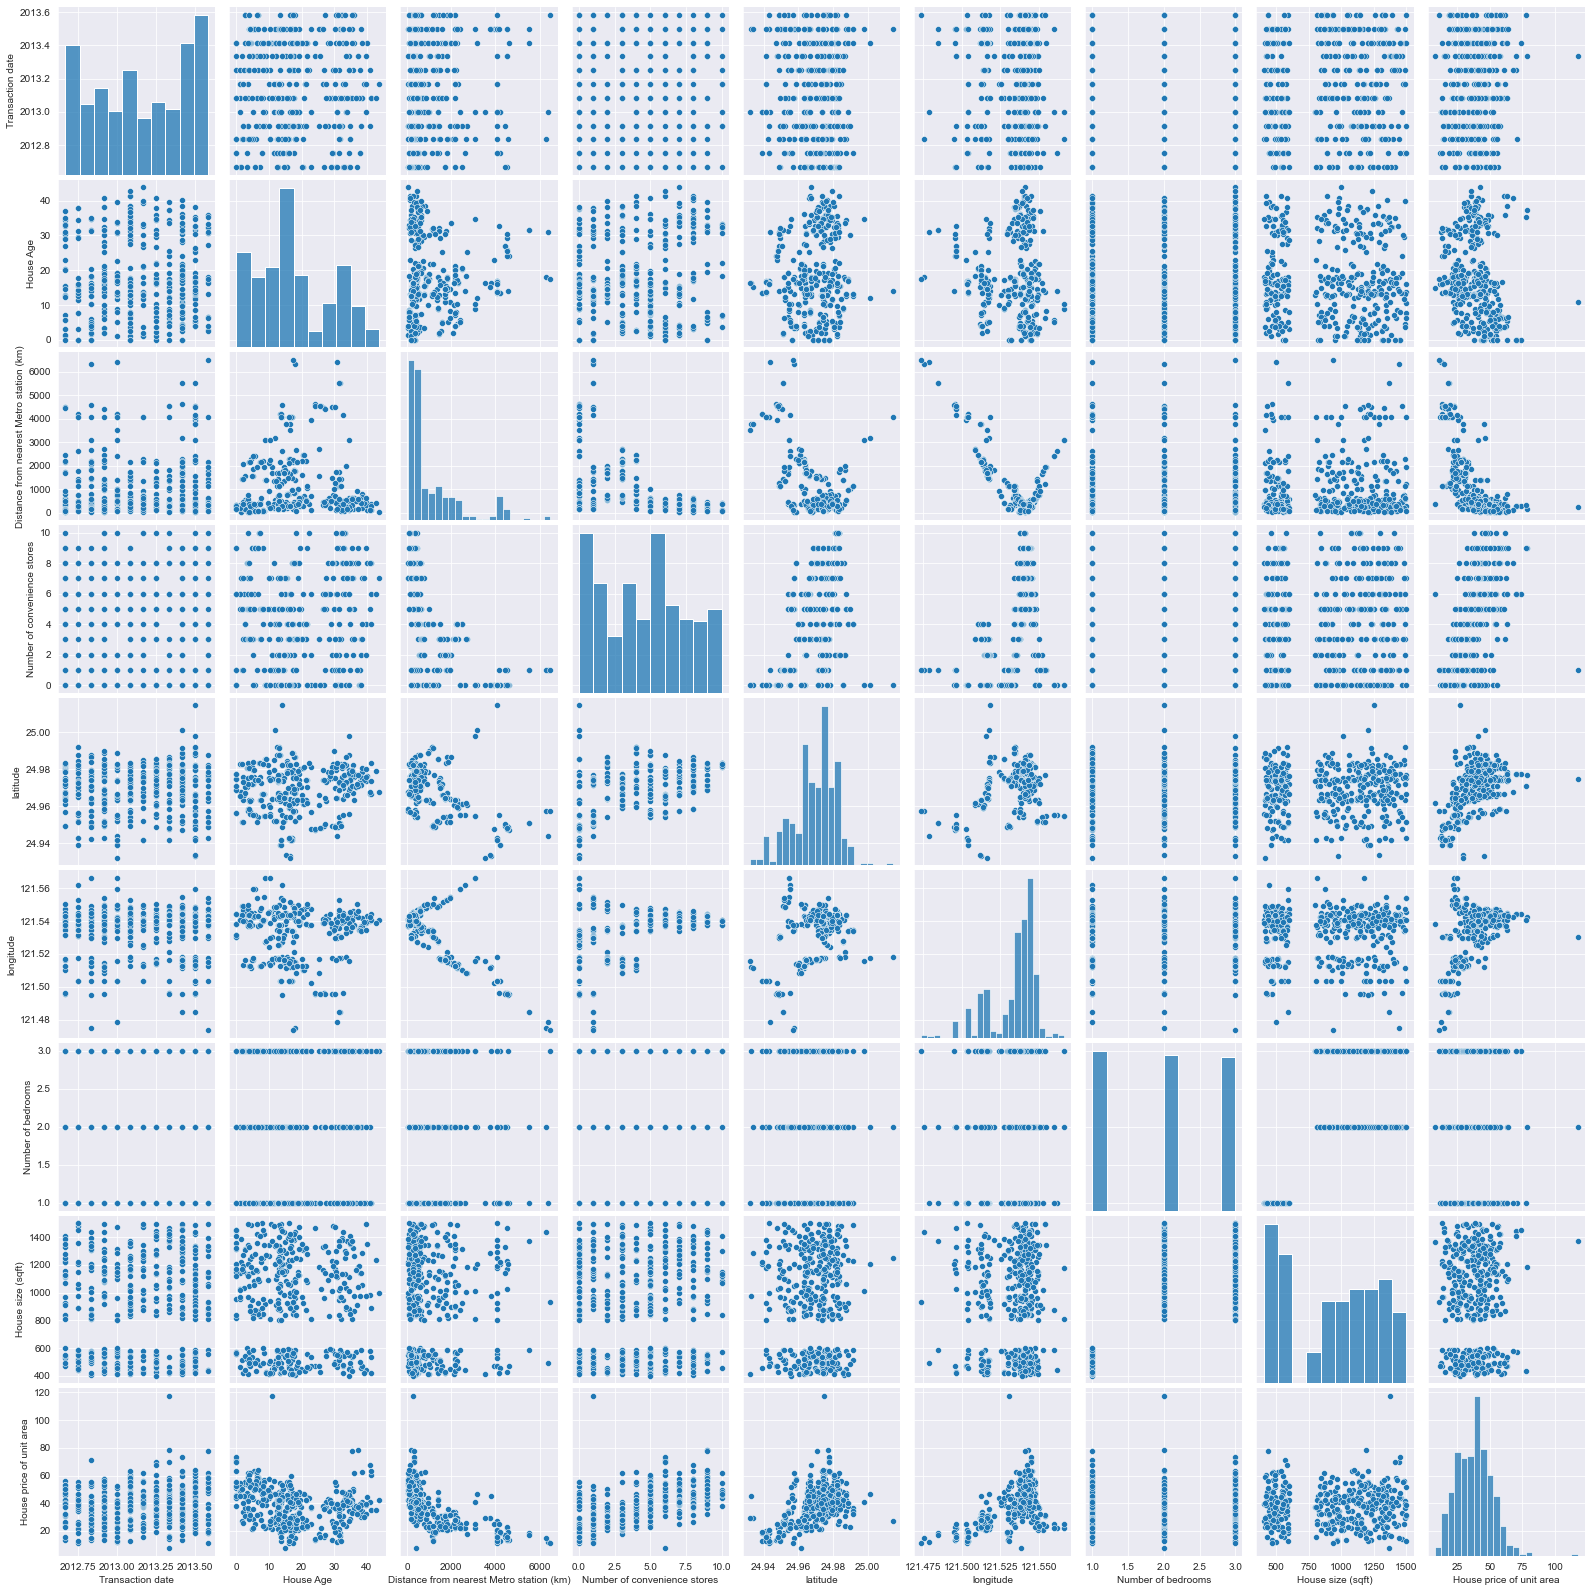

In [9]:
sns.pairplot(df)

- None of the columns follow a Gaussian distribution
- it therefore rules out the possibility of applying StandardScaler

In [10]:
# for i in df.columns:
#     for j in df.columns:
#         if(i!=j):
#             plt.subplot(sns.scatterplot(data=df, x=i, y=j))
#             plt.show()

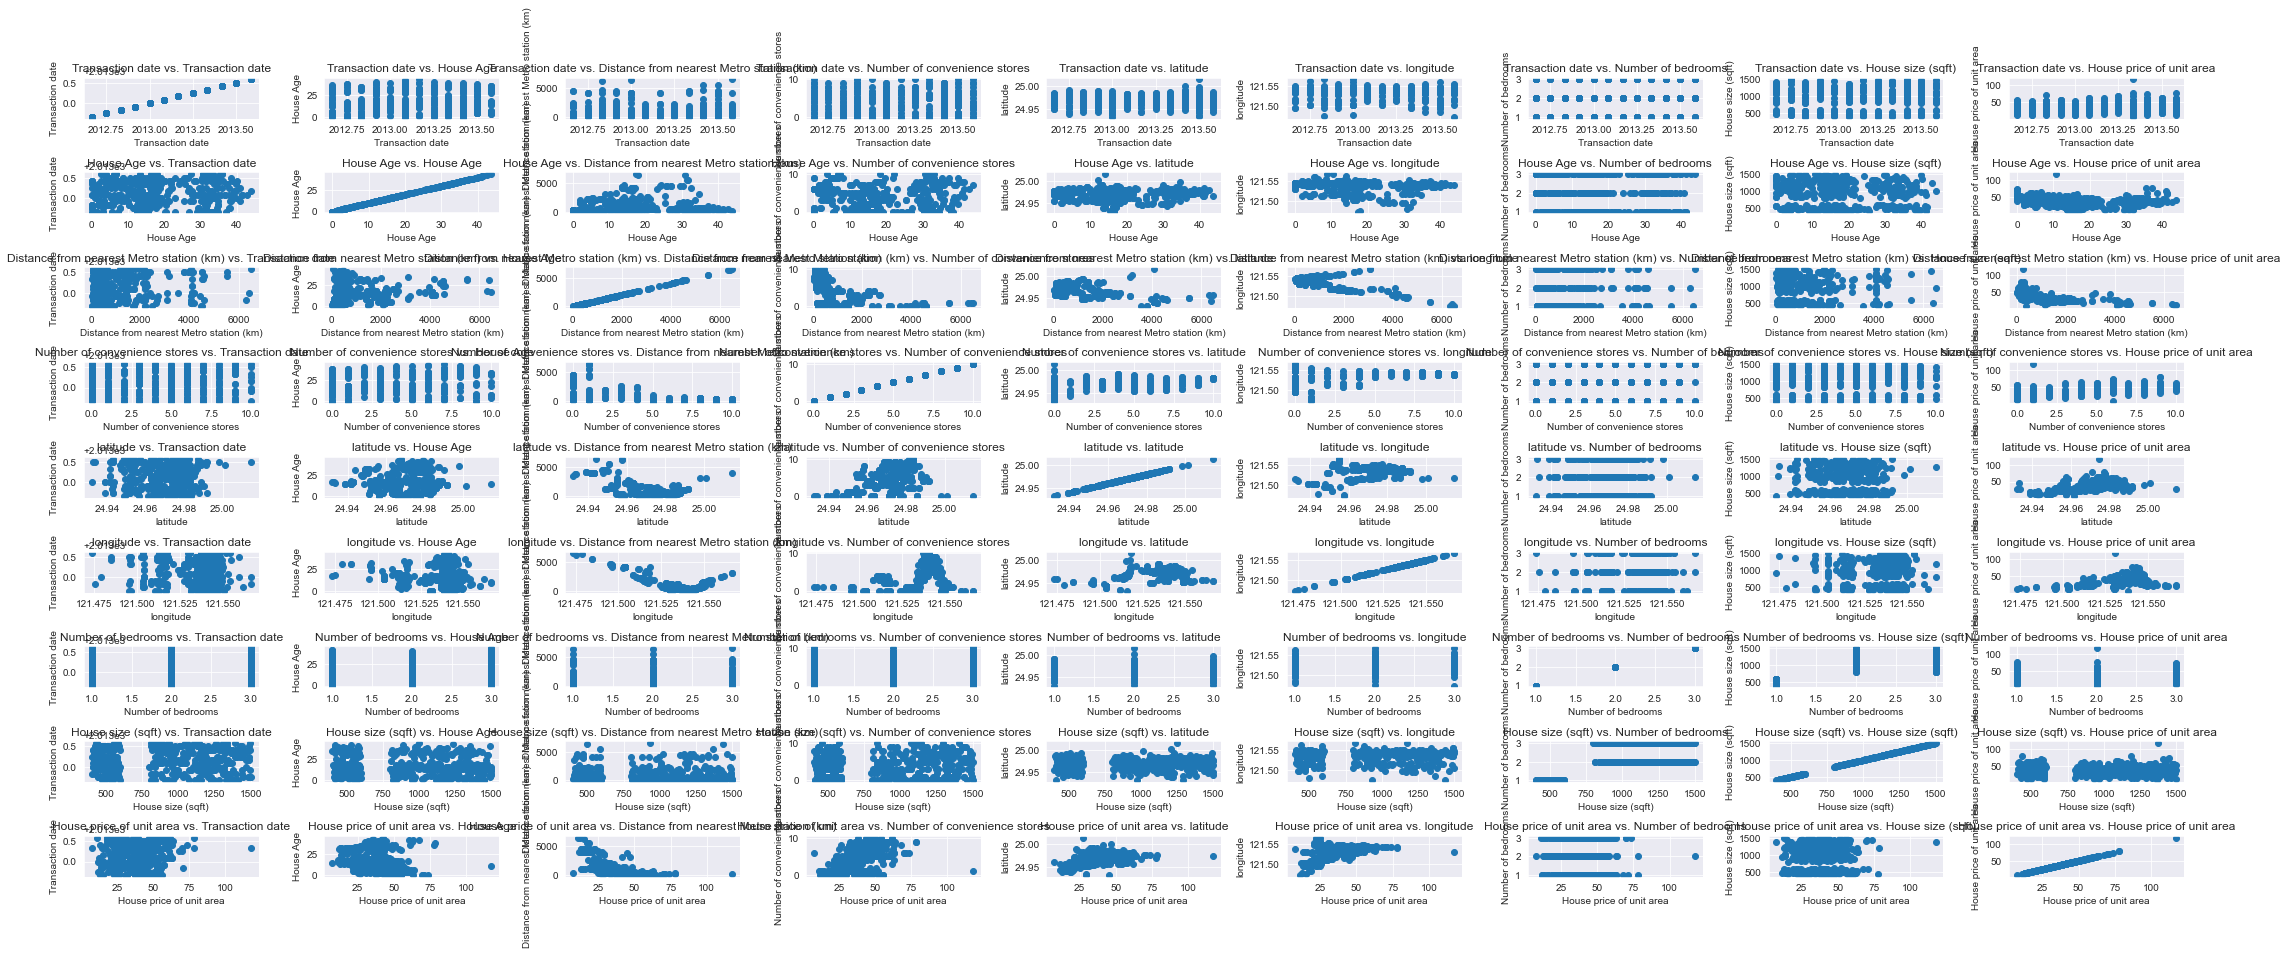

In [11]:
from itertools import product
combos = product(df.columns, df.columns)

# create subplots
fig, axes = plt.subplots(nrows=len(df.columns), ncols=len(df.columns), figsize=(30, 12))

# flatten axes into a 1d array
axes = axes.flat

# iterate and plot
for (x, y), ax in zip(combos, axes):
    ax.scatter(df[x], df[y])
    ax.set(title=f'{x} vs. {y}', xlabel=x, ylabel=y)
plt.tight_layout()
plt.show()

<AxesSubplot:>

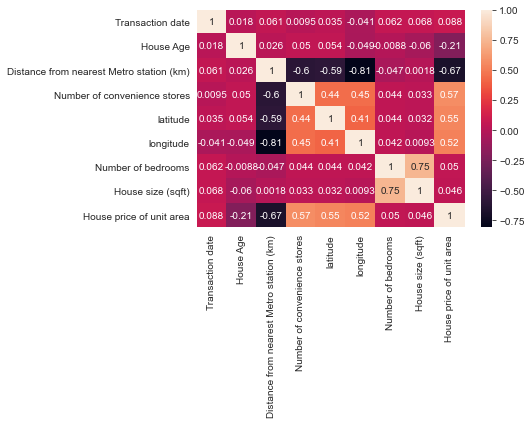

In [12]:
sns.heatmap(df.corr(), annot=True)

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [14]:
y = df['House price of unit area']
X = df.drop(['House price of unit area'],axis=1)

In [15]:
X = scaler.fit_transform(X)

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

##  Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

> - **Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:
$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

> - **Mean Squared Error** (MSE) is the mean of the squared errors:
$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

> - **Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:
$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

> 📌 Comparing these metrics:
- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

> All of these are **loss functions**, because we want to minimize them.

In [17]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

# Linear Regression
- it is the simplest and easiest to learn for regression purposes
Mathematically, we can represent a linear regression as:
y = Ax1+Bx2+ε

In [18]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [19]:
y_pred = lr.predict(X_test)

In [20]:
y_pred = lr.predict(X_test)

print('Test set evaluation:\n')
print_evaluate(y_test, y_pred)

results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, y_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])

Test set evaluation:

MAE: 6.036308529669017
MSE: 107.31134996494154
RMSE: 10.35911916935709
R2 Square 0.5159449094348247


Pros:

- Linear Regression is simple to implement.
- Less complexity compared to other algorithms.

Cons:

- Outliers affect this algorithm badly.

## Decision Tree

In [21]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [22]:
y_pred = dt.predict(X_test)

print('Test set evaluation:\n')
print_evaluate(y_test, y_pred)

results_df_2 = pd.DataFrame(data=[["Decision Tree", *evaluate(y_test, y_pred) , cross_val(DecisionTreeRegressor())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:

MAE: 5.426506024096385
MSE: 105.95204819277109
RMSE: 10.293301131938728
R2 Square 0.5220763852074091


Pros:

- visually intuitive.
- It can work with numerical and categorical features.
- Requires little data preprocessing: no need for one-hot encoding, dummy variables, etc.
    
Cons:
    
- It tends to overfit.

## Lasso Regression

In [23]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train,y_train)

Lasso()

In [24]:
y_pred = lasso.predict(X_test)

print('Test set evaluation:\n')
print_evaluate(y_test, y_pred)

results_df_2 = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_test, y_pred) , cross_val(Lasso())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:

MAE: 8.195793471320608
MSE: 158.70961603034098
RMSE: 12.598000477470263
R2 Square 0.2840999802329458


Pros:

- It avoids overfitting

Cons:

- LASSO will select only one feature from a group of correlated features
- Selected features can be highly biased.

## Random Forest Regressor

In [25]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [26]:
y_pred = rf.predict(X_test)

print('Test set evaluation:\n')
print_evaluate(y_test, y_pred)

results_df_2 = pd.DataFrame(data=[["Random Forest", *evaluate(y_test, y_pred) , cross_val(RandomForestRegressor())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:

MAE: 4.413084337349397
MSE: 92.43066718072285
RMSE: 9.61408691352033
R2 Square 0.5830680073656573


Pros:

- Good at learning complex and non-linear relationships
- Very easy to interpret and understand

Cons:

- They are prone to overfitting
- For very large data sets, the size of the trees can take up a lot of memory.

## Support Vector Regression

In [27]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train,y_train)

SVR()

In [28]:
y_pred = svr.predict(X_test)

print('Test set evaluation:\n')
print_evaluate(y_test, y_pred)

results_df_2 = pd.DataFrame(data=[["Support Vector Regression", *evaluate(y_test, y_pred) , cross_val(SVR())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:

MAE: 5.884581812775495
MSE: 120.13202899134505
RMSE: 10.960475764826318
R2 Square 0.4581139814923446


Pros:

- Robust to outliers.
- Excellent generalization capability
- High prediction accuracy.

Cons:

- Not suitable for large datasets.
- They do not perform very well when the data set has more noise.

## Artificial Neural Networks

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

model = Sequential()

model.add(Dense(X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))

model.add(Dense(64, activation='relu'))

model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1))

model.compile(optimizer=Adam(0.00001), loss='mse')

r = model.fit(X_train, y_train,
              validation_data=(X_test,y_test),
              batch_size=1,
              epochs=100)

Epoch 1/100
331/331 [==============================] - 1s 1ms/step - loss: 1656.1088 - val_loss: 1460.8622
Epoch 2/100
331/331 [==============================] - 0s 994us/step - loss: 1636.3127 - val_loss: 1435.9059
Epoch 3/100
331/331 [==============================] - 0s 1ms/step - loss: 1596.7081 - val_loss: 1384.3242
Epoch 4/100
331/331 [==============================] - 0s 1ms/step - loss: 1517.4541 - val_loss: 1285.6245
Epoch 5/100
331/331 [==============================] - 0s 946us/step - loss: 1375.6311 - val_loss: 1122.0979
Epoch 6/100
331/331 [==============================] - 0s 1ms/step - loss: 1157.8561 - val_loss: 890.5059
Epoch 7/100
331/331 [==============================] - 0s 1ms/step - loss: 873.8248 - val_loss: 622.3588
Epoch 8/100
331/331 [==============================] - 0s 1ms/step - loss: 579.9356 - val_loss: 391.4283
Epoch 9/100
331/331 [==============================] - 0s 1000us/step - loss: 349.8435 - val_loss: 255.6488
Epoch 10/100
331/331 [===============

331/331 [==============================] - 0s 947us/step - loss: 128.3053 - val_loss: 165.9570
Epoch 78/100
331/331 [==============================] - 0s 994us/step - loss: 127.3081 - val_loss: 165.5485
Epoch 79/100
331/331 [==============================] - 0s 947us/step - loss: 131.4106 - val_loss: 164.5843
Epoch 80/100
331/331 [==============================] - 0s 947us/step - loss: 127.5247 - val_loss: 163.2254
Epoch 81/100
331/331 [==============================] - 0s 947us/step - loss: 128.0035 - val_loss: 163.6676
Epoch 82/100
331/331 [==============================] - 0s 994us/step - loss: 130.1634 - val_loss: 163.3300
Epoch 83/100
331/331 [==============================] - 0s 947us/step - loss: 127.3391 - val_loss: 163.0764
Epoch 84/100
331/331 [==============================] - 0s 947us/step - loss: 125.4004 - val_loss: 162.7343
Epoch 85/100
331/331 [==============================] - 0s 994us/step - loss: 126.0207 - val_loss: 161.1650
Epoch 86/100
331/331 [===================

In [30]:
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n')
print_evaluate(y_test, test_pred)

results_df_2 = pd.DataFrame(data=[["Artficial Neural Network", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:

MAE: 8.050471574714384
MSE: 155.10903633164463
RMSE: 12.454277832602124
R2 Square 0.3003413091576961


## XGBRegressor

In [31]:
import xgboost
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [32]:
y_pred = svr.predict(X_test)

print('Test set evaluation:\n')
print_evaluate(y_test, y_pred)

results_df_2 = pd.DataFrame(data=[["XGB Regressor", *evaluate(y_test, y_pred) , cross_val(XGBRegressor())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:

MAE: 5.884581812775495
MSE: 120.13202899134505
RMSE: 10.960475764826318
R2 Square 0.4581139814923446


## LightGBM

In [33]:
import lightgbm as lgb
gbm = lgb.LGBMRegressor()
gbm.fit(X_train,y_train)

LGBMRegressor()

In [34]:
y_pred = gbm.predict(X_test)

print('Test set evaluation:\n')
print_evaluate(y_test, y_pred)

results_df_2 = pd.DataFrame(data=[["LightGBM ", *evaluate(y_test, y_pred) , cross_val(lgb.LGBMRegressor())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:

MAE: 5.062158651838165
MSE: 102.1341524273597
RMSE: 10.106144290844046
R2 Square 0.5392979734280249


## ExtraTreesRegressor

In [35]:
from sklearn.ensemble import ExtraTreesRegressor
ext = ExtraTreesRegressor()
ext.fit(X_train,y_train)

ExtraTreesRegressor()

In [36]:
y_pred = ext.predict(X_test)

print('Test set evaluation:\n')
print_evaluate(y_test, y_pred)

results_df_2 = pd.DataFrame(data=[["Extra Trees", *evaluate(y_test, y_pred) , 0]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:

MAE: 4.093012048192773
MSE: 88.97291843373489
RMSE: 9.432545702711167
R2 Square 0.5986650610176865


## Model Comparison

In [37]:
results_df.reset_index(inplace=True)
results_df

,index,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,0,Linear Regression,6.036309,107.311350,10.359119,0.515945,0.577030
1,1,Decision Tree,5.426506,105.952048,10.293301,0.522076,0.273704
2,2,Lasso Regression,8.195793,158.709616,12.598000,0.284100,0.352691
3,3,Random Forest,4.413084,92.430667,9.614087,0.583068,0.688976
4,4,Support Vector Regression,5.884582,120.132029,10.960476,0.458114,0.523684
5,5,Artficial Neural Network,8.050472,155.109036,12.454278,0.300341,0.000000
6,6,XGB Regressor,5.884582,120.132029,10.960476,0.458114,0.667837
7,7,LightGBM,5.062159,102.134152,10.106144,0.539298,0.705297
8,8,Extra Trees,4.093012,88.972918,9.432546,0.598665,0.000000


<AxesSubplot:ylabel='Model'>

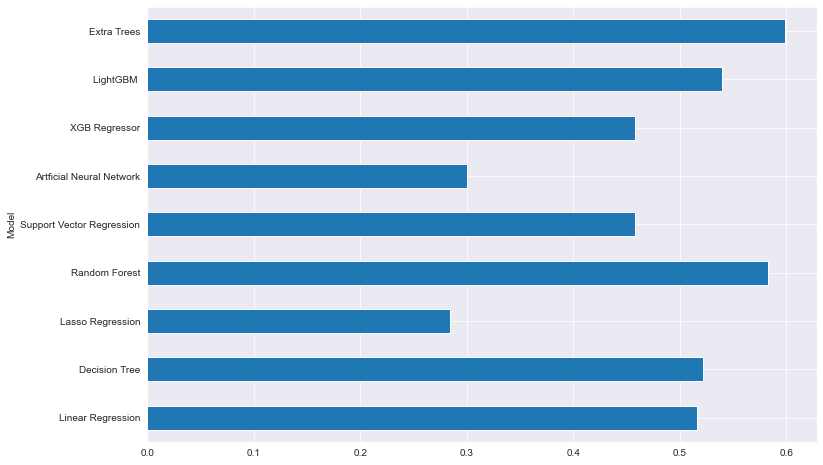

In [38]:
results_df.set_index('Model', inplace=True)
results_df['R2 Square'].plot(kind='barh', figsize=(12, 8))

I would therefore choose RandomForestRegressor as 
- it fits a number of decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.
-  It can handle binary features, categorical features, and numerical features.
- There is very little pre-processing that needs to be done. 
- The data does not need to be rescaled or transformed.